# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Answer to Q1 is in file 'EDA_Assignment_Q1**

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load dataset
foreign_df = pd.read_csv('/content/Data/ForeignGifts_edu.csv')
foreign_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

**My Findings:**

- Mean (Average gift amount): $588,232 indicates the dataset contains some very large gift amounts

- The median (50th percentile): $94,615 is much lower than the mean, indicating that the distribution is very skewed

- The min is negative which could mean there are some incorrect data entries

- The max is $100,000,000 which is a significant outlier

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


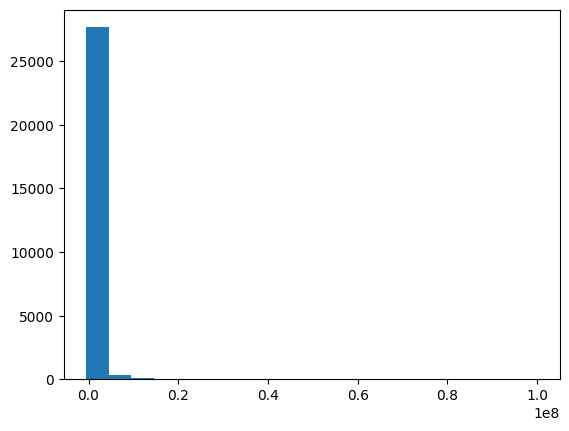

In [36]:
# Create histogram
foreign_df['Foreign Gift Amount'].hist(bins = 20, grid = False)

# Describe the variable
foreign_df['Foreign Gift Amount'].describe()

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

> - The highest proportion of gifts are contract, then monetary gifts, then the smallest is real estate.

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


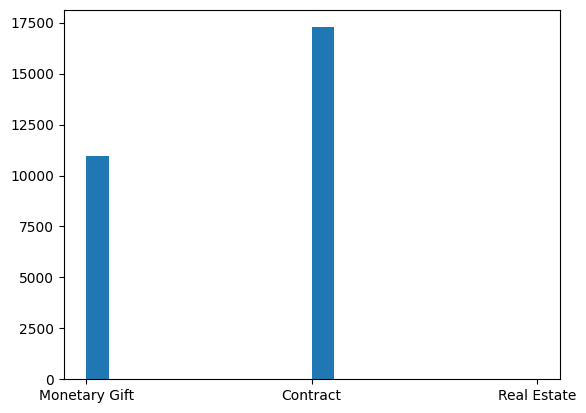

In [37]:
# Histogram
foreign_df['Gift Type'].hist(bins = 20, grid = False)

# Find proportions
gift_type_counts = foreign_df['Gift Type'].value_counts()
gift_type_counts / gift_type_counts.sum()

4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

**Patterns I notice:**
*   The real estate gifts look more concentrated, with a single sharp peak around one value indicating that real estate gifts tend to have higher values.
*   The contract gifts are also more concentrated towards one value but less so than real estate.
*   Monetary gifts have the highest variability out with two main peaks.
*   The log transformation helps to smooth out the data and make it look more normally distributed but peaks are still aparent.



/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

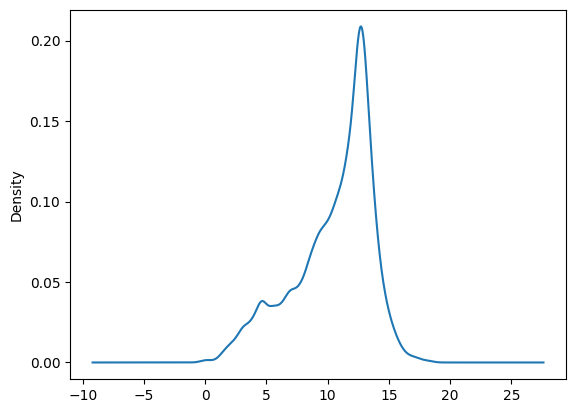

In [40]:
# Kernel density plot of the log of Foreign Gift Amount
foreign_df['Foreign_Gift_Amount_log'] = np.log(foreign_df['Foreign Gift Amount'])
foreign_df['Foreign_Gift_Amount_log'].plot.density()

,Foreign_Gift_Amount_log
Gift Type,
Contract,"Axes(0.125,0.11;0.775x0.77)"
Monetary Gift,"Axes(0.125,0.11;0.775x0.77)"
Real Estate,"Axes(0.125,0.11;0.775x0.77)"


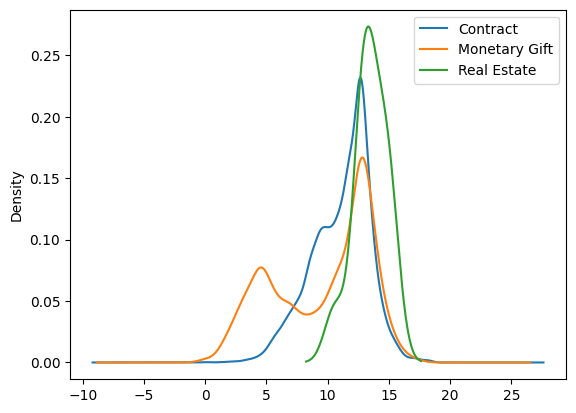

In [42]:
# Kernel density plot of the log of Foreign Gift Amount conditional on gift type
foreign_df.groupby('Gift Type')['Foreign_Gift_Amount_log'].plot.density(legend = True)

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?


In [50]:
# Find top 15 countries in terms of the number of gifts
top_countries_count = foreign_df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15)

# FInd the top 15 countries in terms of the amount given
top_countries_amount = foreign_df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)

# Results:
print("Top 15 countries by number of gifts:")
print(top_countries_count)

print("Top 15 countries by total amount given:")
print(top_countries_amount)

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64
Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                4011576

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.


Institution Name
University of California, Los Angeles          3916
California Institute of Technology             2502
Columbia University in the City of New York    1127
Ohio State University (The)                    1014
Johns Hopkins University                        899
University of Michigan - Ann Arbor              715
Stanford University                             668
Cornell University                              653
University of Pennsylvania                      625
Massachusetts Institute of Technology           582
Yale University                                 550
Harvard University                              453
University of Colorado Denver                   436
University of Chicago (The)                     401
Arizona State University                        400
Name: Foreign Gift Amount, dtype: int64


<Axes: >

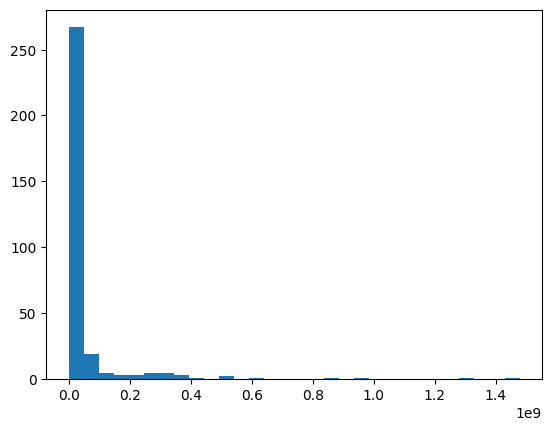

In [60]:
# Top 15 institutions by total amount received
top_institutions = foreign_df.groupby('Institution Name')['Foreign Gift Amount'].count().nlargest(15)

# Display results
print(top_institutions)

# Histogram of the total amount received by all institutions
foreign_df.groupby('Institution Name')['Foreign Gift Amount'].sum().hist(bins = 30, grid = False)

7. Which giftors provide the most money, in total?

In [66]:
# Top 15 giftors by total amount given
top_giftors = foreign_df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

**Variables that need to be cleaned:**

- 'Month' needs to be converted to datetime because it is an object
- Many numerical columns (Number of Rigs) are currently stored as object types instead of numeric. These need to be converted to int64 or float64 using pd.to_numeric.
- Columns that contain 'Not Available' need to be converted to NaN values

In [127]:
# Load data
rigs_df = pd.read_csv('/content/Data/drilling_rigs.csv')

# Display number of observations (rows) and variables (columns)
print(f"Number of observations: {rigs_df.shape[0]}")
print(f"Number of variables: {rigs_df.shape[1]}")

# Check variable data types
rigs_df.dtypes

Number of observations: 623
Number of variables: 10


,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


In [113]:
# Look at first 5 rows
rigs_df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [128]:
# Convert 'Month' variable to datetime
rigs_df['time'] = pd.to_datetime(rigs_df['Month'], format='mixed')

3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

[Text(0.5, 1.0, 'Active Well Service Rig Count Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Rigs')]

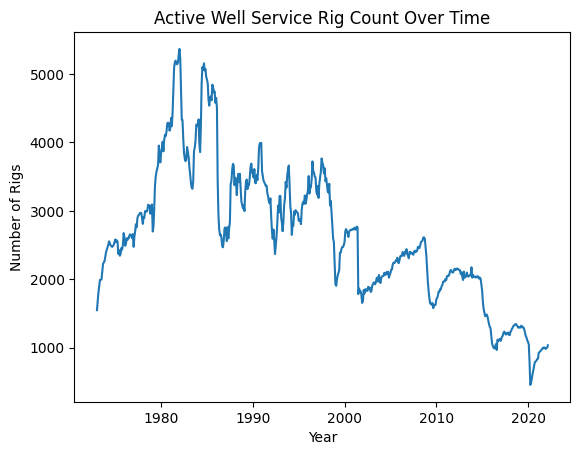

In [129]:
# Convert to numeric
rigs_df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(rigs_df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# Drop NaN's
rigs_df = rigs_df.dropna(subset = ['time', 'Active Well Service Rig Count (Number of Rigs)'])

# Create a time series line plot
fig = sns.lineplot(data = rigs_df, x = 'time', y = 'Active Well Service Rig Count (Number of Rigs)')
fig.set(title = 'Active Well Service Rig Count Over Time', xlabel = "Year", ylabel = 'Number of Rigs')

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

[Text(0.5, 1.0, 'Change in Active Well Service Rig Count Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Change in Number of Rigs')]

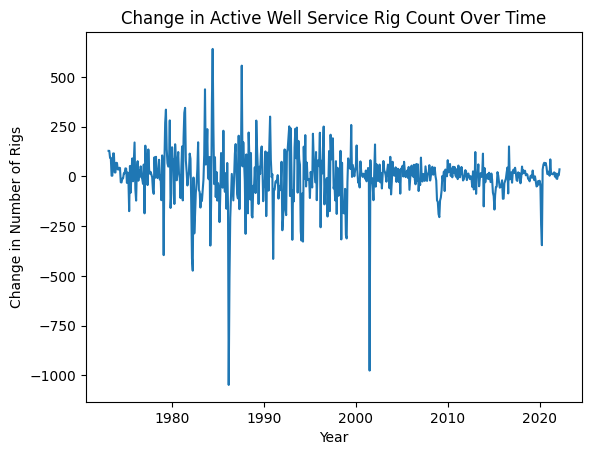

In [130]:
# Compute the first difference
rigs_df['Rig Count Change'] = rigs_df['Active Well Service Rig Count (Number of Rigs)'].diff()

# Create a time series plot
fig = sns.lineplot(data = rigs_df, x = 'time', y = 'Rig Count Change')
fig.set(title = 'Change in Active Well Service Rig Count Over Time', xlabel = 'Year', ylabel = 'Change in Number of Rigs')

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

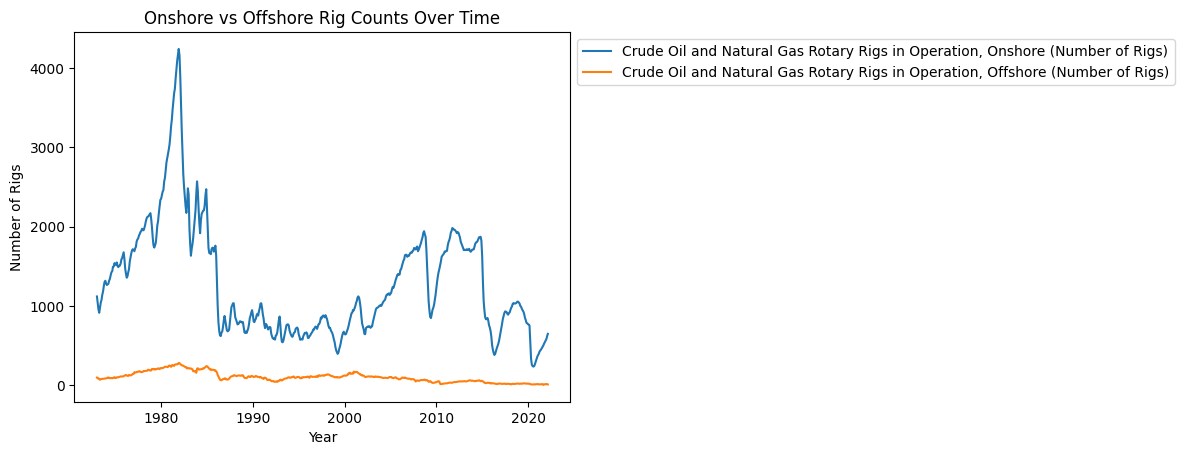

In [134]:
# Melt columns.
melted_df = rigs_df.melt(id_vars = 'time',
                         value_vars = ['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                         var_name = 'Rig Type',
                         value_name = 'Number of Rigs')

# Create a plot
fig = sns.lineplot(data = melted_df, x = 'time', y = 'Number of Rigs', hue = 'Rig Type')
fig.set(title = "Onshore vs Offshore Rig Counts Over Time", xlabel = "Year", ylabel = "Number of Rigs")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))